In [1]:
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("pimadiabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
x=data.drop("Outcome",axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y=data.drop("Outcome",axis=1)
y.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
from sklearn.model_selection import StratifiedKFold

In [9]:
fold=StratifiedKFold(n_splits=5)

In [10]:
import seaborn as sn

In [11]:
dd=sn.load_dataset("iris")

In [12]:
dd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [14]:
dd.species=lb.fit_transform(dd.species)
dd.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
dd.shape


(150, 5)

In [16]:
X=dd.drop("species",axis=1)
Y=dd.species

In [17]:
for train,test in fold.split(X,Y):
    print(train,test)
    print("length of train data=",len(train))
    print("length of test data=",len(test))
    print()

[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] [  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
length of train data= 120
length of test data= 30

[  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 1

In [18]:
for train,test in fold.split(X,Y):
    print("Xtrain")
    print(X.iloc[train])

Xtrain
     sepal_length  sepal_width  petal_length  petal_width
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[120 rows x 4 columns]
Xtrain
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1    

In [19]:
for train,test in fold.split(X,Y):
    print("Y")
    print(Y.iloc[train])

Y
10     0
11     0
12     0
13     0
14     0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 120, dtype: int32
Y
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 120, dtype: int32
Y
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 120, dtype: int32
Y
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 120, dtype: int32
Y
0      0
1      0
2      0
3      0
4      0
      ..
135    2
136    2
137    2
138    2
139    2
Name: species, Length: 120, dtype: int32


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
l_model=LogisticRegression()

In [22]:
Y.shape

(150,)

In [23]:
f=1
for train,test in fold.split(X,Y):
    l_model.fit(X.iloc[train],Y.iloc[train])
    print(f"score of fold{f}={l_model.score(X.iloc[test],Y.iloc[test])}")
    print("predicted test")
    print(l_model.predict(X.iloc[test]))
    print("actual values of y test")
    print(Y.iloc[test])
    f+=1

score of fold1=0.9666666666666667
predicted test
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2]
actual values of y test
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
Name: species, dtype: int32
score of fold2=1.0
predicted test
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
actual values of y test
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
110    2
111    2
112    2
113    2
114    2
115    2
116    2
117    2
118    2
119    2
Name: species, dtype: int32
score of fold3=0.9333333333333333
predicted test
[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2]
actual values of y test
20     0
21   

In [24]:
#confusion matrix

In [25]:
import matplotlib.pyplot as plt

In [26]:
from sklearn.metrics import confusion_matrix

score of fold1=0.9666666666666667


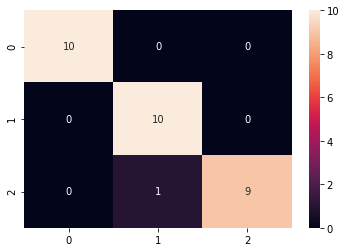

score of fold2=1.0


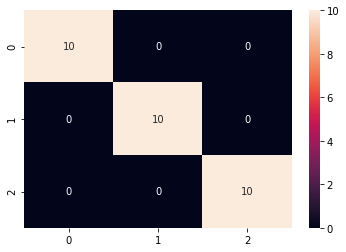

score of fold3=0.9333333333333333


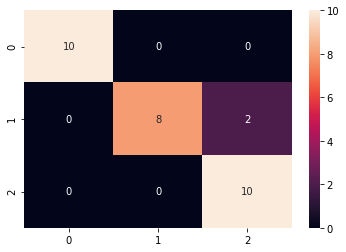

score of fold4=0.9666666666666667


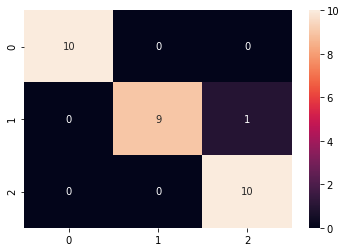

score of fold5=1.0


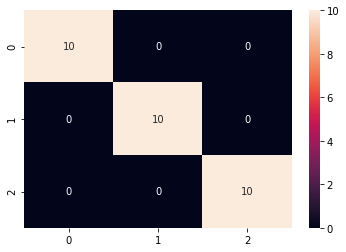

In [27]:
f=1
for train,test in fold.split(X,Y):
    l_model.fit(X.iloc[train],Y.iloc[train])
    print(f"score of fold{f}={l_model.score(X.iloc[test],Y.iloc[test])}")
    
    ypred=l_model.predict(X.iloc[test])
    cm=confusion_matrix(Y.iloc[test],ypred)                      
    sn.heatmap(cm,annot=True)
    
    plt.show()
    f+=1